In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
#| default_exp plot

In [ ]:
#| export
import os, uuid
import numpy as np
from matplotlib import colors       
import matplotlib.pyplot as plt


In [ ]:
#| export
class PlotARCArrays:

    def __init__(self):
        self.cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
        self.norm = colors.Normalize(vmin=0, vmax=9)

    def plot_arrays(self, arrays, dataset, code):
        """    Plots the first train and test pairs of a specified task,
        using same color scheme as the ARC app    """    
        # print(arrays)
        w=len(arrays)
        fig, paxs  = plt.subplots(1, w, figsize=(3*w ,3))
        plt.suptitle(f'{dataset} {code}', fontsize=20, fontweight='bold', y=1)

        for j in range(len(arrays)):     
            self.plot_array(paxs[j], arrays[j]['array'], arrays[j]['title'])
        
        fig.patch.set_linewidth(5)
        fig.patch.set_edgecolor('black') 
        fig.patch.set_facecolor('#dddddd')
    
        plt.tight_layout()
        # plt.show()  
        
        return fig
        
    def plot_array(self, pax, input_matrix, title):
        pax.imshow(input_matrix, cmap=self.cmap, norm=self.norm)
        pax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
        
        plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
        pax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
        pax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
        
        pax.set_title( title)


    def to_image(self, dir, input, output, env, dataset, code):
        guid = str(uuid.uuid4())

        # print('env_array', env_array)
        a = np.array(env) 
        b = a.round()
        env = b.tolist() 
        # print('env_array', env_array)



        arrays = [
            {'array' : input, 'title' : 'input'},
            {'array' : output, 'title' : 'output'},
            {'array' : env, 'title' : 'env'}
        ]
        fig = self.plot_arrays(arrays, dataset, code)     
        os.makedirs(dir, exist_ok=True)   
        fileprefix = f'{dir}/{code}-{guid}'
        image_filename = f'{fileprefix}.png'
        # html_filename = f'{fileprefix}.html'
        plt.savefig(f'{image_filename}')

        # Save the screen image to an HTML format
        # plotly_fig = tls.mpl_to_plotly(fig)
        # plotly_fig.write_html(html_filename)
        

        return image_filename 

/tmp/ARC/00000001-a86e2e2e-6fc6-4ef2-9aec-04edbc75fac9.png


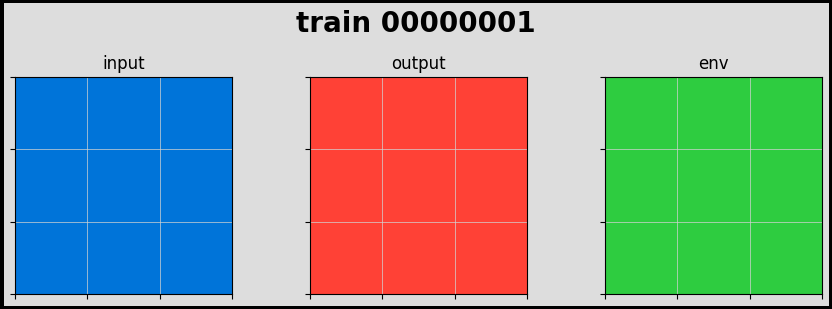

In [ ]:
#| gui

pas = PlotARCArrays()
image_filename = pas.to_image('/tmp/ARC', [[1,1,1],[1,1,1],[1,1,1]], [[2,2,2],[2,2,2],[2,2,2]], [[2.6,3,3],[3,3,3],[3,3,3]], 'train', '00000001')
print(image_filename)

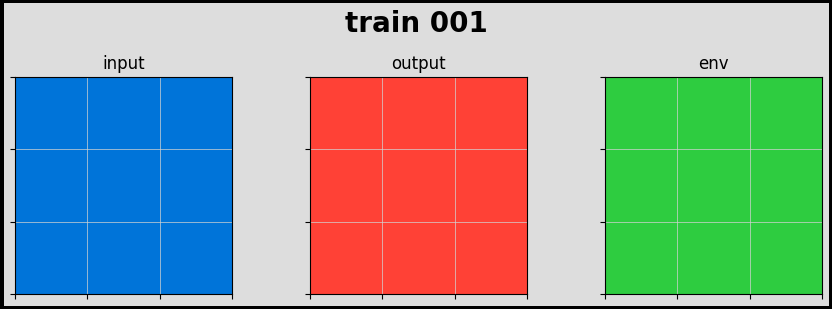

In [ ]:
#| gui
dataset = 'train'
code = '001'
pas = PlotARCArrays()
arrays = [
{'array' : [[1,1,1],[1,1,1],[1,1,1]], 'title' : 'input'},
{'array' : [[2,2,2],[2,2,2],[2,2,2]], 'title' : 'output'},
{'array' : [[3,3,3],[3,3,3],[3,3,3]], 'title' : 'env'}
]
f = pas.plot_arrays(arrays, dataset, code)

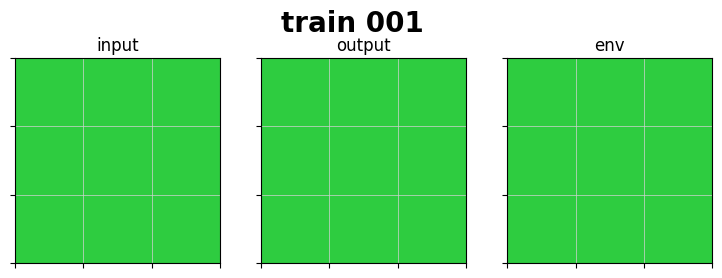

In [ ]:
#| gui
dataset = 'train'
w=3
fig, axs  = plt.subplots(1, w, figsize=(3*w ,3))
code = '001'
plt.suptitle(f'{dataset} {code}', fontsize=20, fontweight='bold', y=1)


pas = PlotARCArrays()
input_matrix = [[3,3,3],[3,3,3],[3,3,3]]
pas.plot_array(axs[0], input_matrix, 'input')
input_matrix = [[3,3,3],[3,3,3],[3,3,3]]
pas.plot_array(axs[1], input_matrix, 'output')
input_matrix = [[3,3,3],[3,3,3],[3,3,3]]
pas.plot_array(axs[2], input_matrix, 'env')




In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()